# Análsis de datos con Melbourne

https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

https://www.kaggle.com/datasets/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

## Carga de datos

In [1]:
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../../../data/Melbourne_housing_FULL.csv')
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

## Profiling

In [3]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile

## Valores faltantes

In [4]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## Análisis univariante

In [5]:
%matplotlib inline

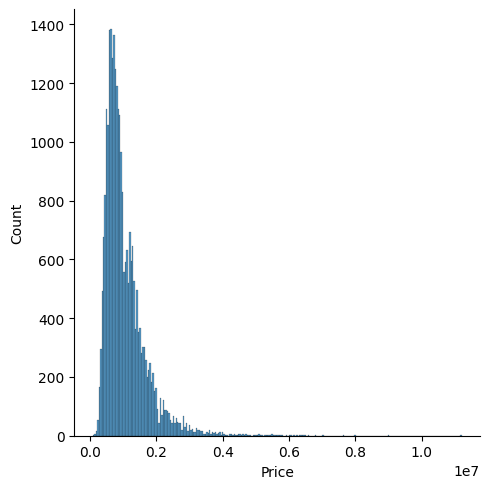

In [6]:

sns.displot(data=df, x='Price')
plt.show()

(0.0, 4000000.0)

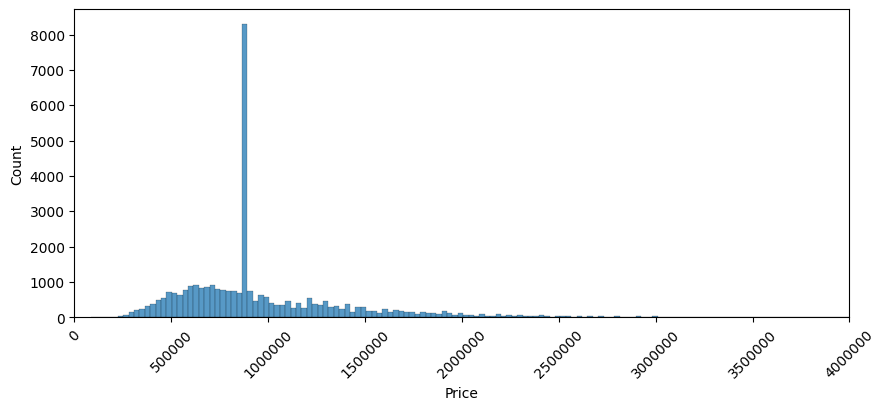

In [7]:
plt.figure(figsize=(10, 4))
df['Price'].fillna(df['Price'].median(), inplace=True)
sns.histplot(data=df, x='Price')
plt.ticklabel_format(style='plain', axis='x')  # Desactivar la notación científica en el eje X
plt.xticks(rotation=45)
plt.xlim(0, 4000000)

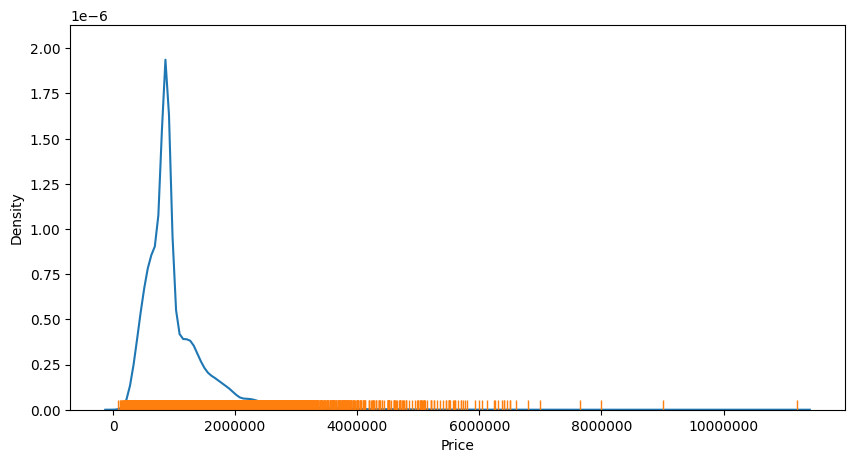

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="Price")
sns.rugplot(data=df, x="Price")
plt.ticklabel_format(style='plain', axis='x')  # Desactivar la notación científica en el eje X
# plt.xlim(0, 1500000)

<Axes: xlabel='Bathroom', ylabel='count'>

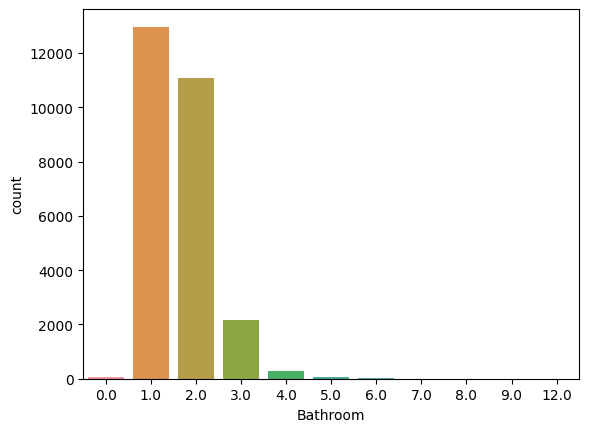

In [9]:
sns.countplot(data=df, x='Bathroom')

<Axes: xlabel='Bedroom2', ylabel='count'>

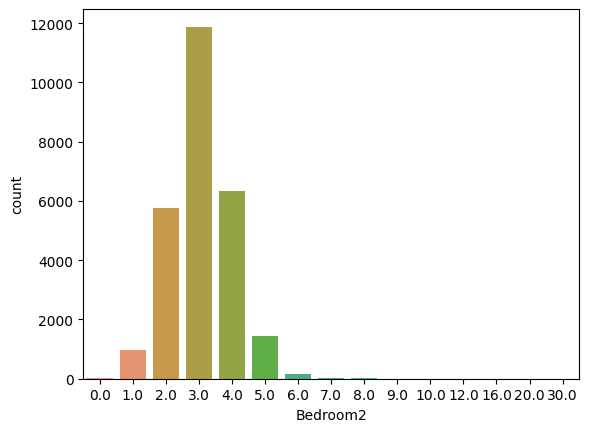

In [10]:
sns.countplot(data=df, x='Bedroom2')

In [11]:
from data_util import calc_missing
# el archivo data_util.py tiene que estar en el mismo directorio
calc_missing(df)

Distance 1 / 34857 0.00 %
Postcode 1 / 34857 0.00 %
Bedroom2 8217 / 34857 23.57 %
Bathroom 8226 / 34857 23.60 %
Car 8728 / 34857 25.04 %
Landsize 11810 / 34857 33.88 %
BuildingArea 21115 / 34857 60.58 %
YearBuilt 19306 / 34857 55.39 %
CouncilArea 3 / 34857 0.01 %
Lattitude 7976 / 34857 22.88 %
Longtitude 7976 / 34857 22.88 %
Regionname 3 / 34857 0.01 %
Propertycount 3 / 34857 0.01 %


<Axes: xlabel='BuildingArea'>

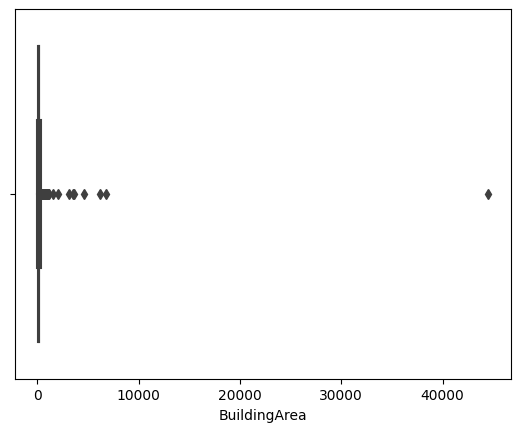

In [12]:
sns.boxplot(data=df, x='BuildingArea')

<Axes: xlabel='BuildingArea'>

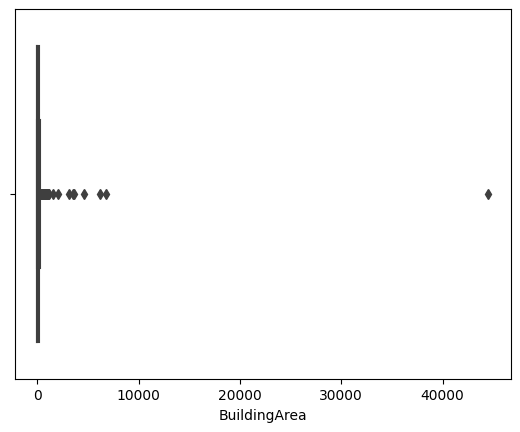

In [13]:
df['BuildingArea'].fillna(0, inplace=True)
sns.boxplot(data=df, x='BuildingArea')

In [14]:
calc_missing(df)

Distance 1 / 34857 0.00 %
Postcode 1 / 34857 0.00 %
Bedroom2 8217 / 34857 23.57 %
Bathroom 8226 / 34857 23.60 %
Car 8728 / 34857 25.04 %
Landsize 11810 / 34857 33.88 %
YearBuilt 19306 / 34857 55.39 %
CouncilArea 3 / 34857 0.01 %
Lattitude 7976 / 34857 22.88 %
Longtitude 7976 / 34857 22.88 %
Regionname 3 / 34857 0.01 %
Propertycount 3 / 34857 0.01 %


<Axes: xlabel='Bedroom2'>

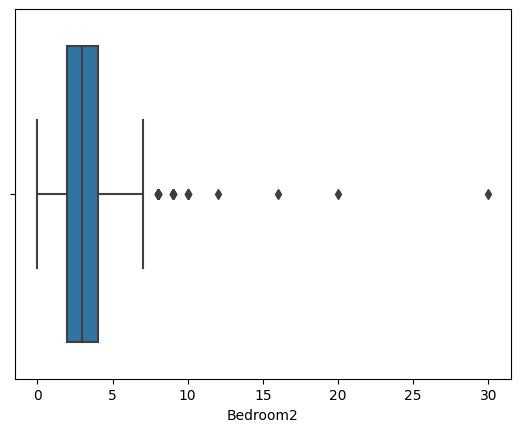

In [15]:
sns.boxplot(data=df, x='Bedroom2')

In [16]:
# Opción 1. Rellenar con la moda
# sns.countplot(data=df, x='Bedroom2')
# df['Bedroom2'].fillna(df['Bedroom2'].mode()[0], inplace=True)

# Opción 2. Rellenar Bedroom2 con la moda/mediana de Bedroom2 en las filas que tengan los mismos valores en columnas correlacionadas


# Opción 3. KNNImputer

In [17]:
df[['Rooms', 'Bedroom2']].tail(40)

Rooms  Bedroom2
34817      3       3.0
34818      4       4.0
34819      3       3.0
34820      4       4.0
34821      3       3.0
34822      2       2.0
34823      5       5.0
34824      5       5.0
34825      4       4.0
34826      4       4.0
34827      4       4.0
34828      3       3.0
34829      3       NaN
34830      3       3.0
34831      4       4.0
34832      4       NaN
34833      4       4.0
34834      4       4.0
34835      3       3.0
34836      5       5.0
34837      5       5.0
34838      2       NaN
34839      2       NaN
34840      2       NaN
34841      2       2.0
34842      3       3.0
34843      3       3.0
34844      1       NaN
34845      4       4.0
34846      4       4.0
34847      3       3.0
34848      4       4.0
34849      3       3.0
34850      3       3.0
34851      3       3.0
34852      4       4.0
34853      2       2.0
34854      2       2.0
34855      3       NaN
34856      2       2.0

## Borrar columnas

In [18]:
# Borrar columnas Bedroom2
df.drop('Bedroom2', axis=1, inplace=True)


In [19]:
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h   870000.0     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u   870000.0     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0       1.0  1.0     126.0           0.0   
1  3/12/2016       2.5    3067.0       1.0  1.0     202.0           0.0   
2  4/02/2016       2.5    3067.0       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0       2.0  1.0       0.0           0.0   
4  4/03/2017       2.5    3067.0       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea  Lattitude  Longtitude  \
0        NaN  Yarra City Council   -37.8014    144.9958   
1        NaN  Yarra City Council   -37.7996    144.9984   
2     1900.0  Yarra City Council   -37.8079    144.9934   
3        NaN  Yarra City Council   -37.8114    145.0116   
4     1900.0  Yarra City Council   -37.8093    144.9944   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

## Análisis bivariante

<Axes: xlabel='Bathroom', ylabel='Rooms'>

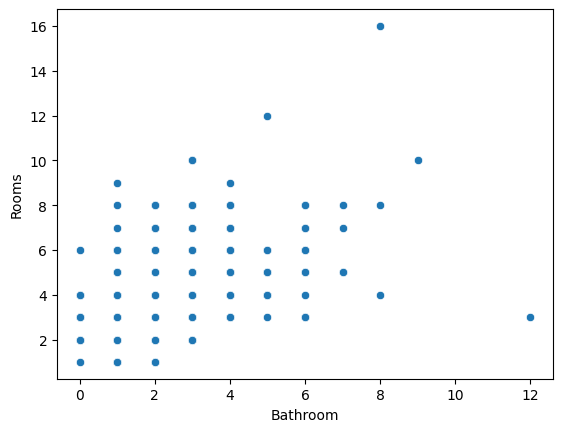

In [20]:
# Bathroom con: Rooms, Price, Car
sns.scatterplot(data=df, x='Bathroom', y='Rooms')

<Axes: xlabel='Bathroom', ylabel='Price'>

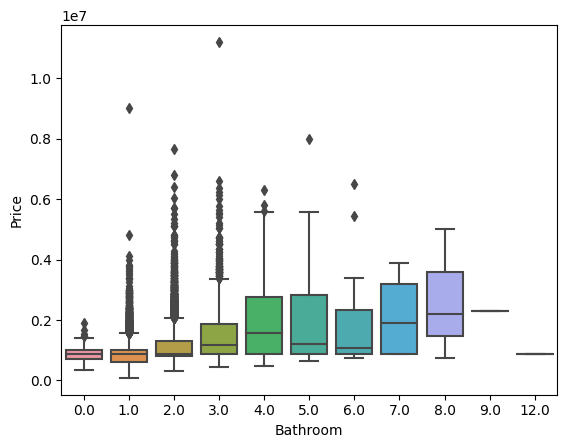

In [21]:
sns.boxplot(data=df, x='Bathroom', y='Price')

<Axes: xlabel='Bathroom', ylabel='Car'>

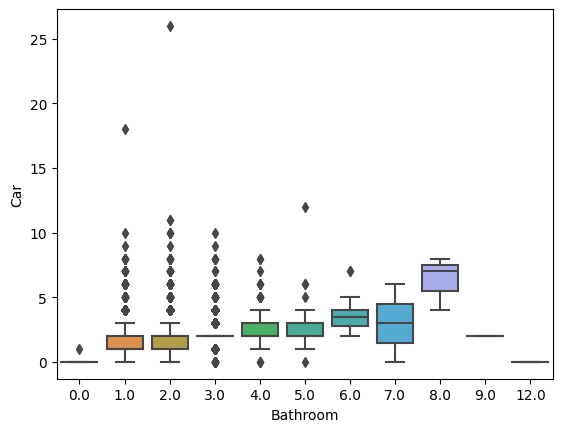

In [22]:
sns.boxplot(data=df, x='Bathroom', y='Car')

<Axes: xlabel='Bathroom', ylabel='Price'>

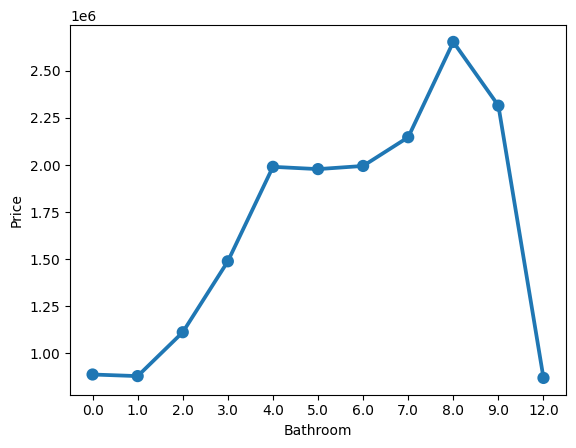

In [23]:
sns.pointplot(data=df, x='Bathroom', y='Price', errorbar=None)

<Axes: xlabel='Bathroom', ylabel='Price'>

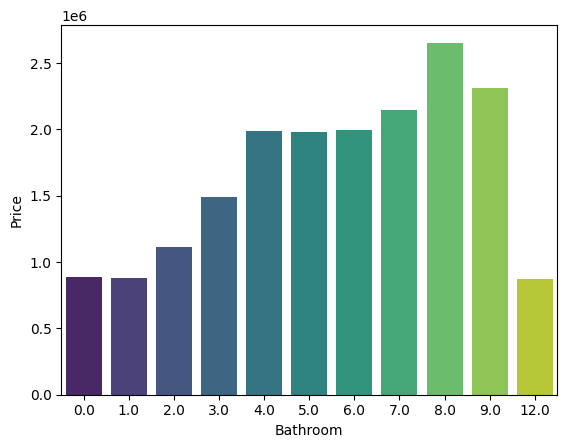

In [24]:
sns.barplot(data=df, x='Bathroom', y='Price', errorbar=None, palette='viridis')

<Axes: xlabel='Bathroom', ylabel='Price'>

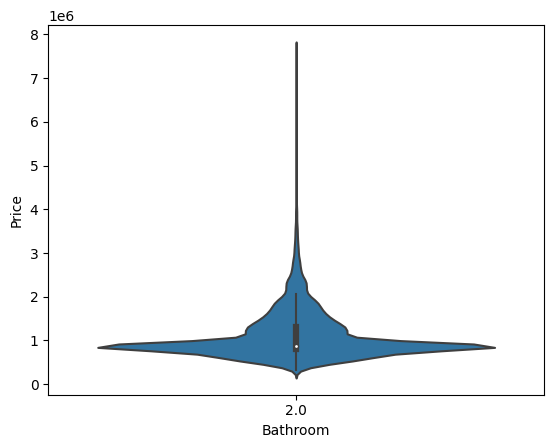

In [25]:
# plt.figure(figsize=(10, 8))
# filter = (df['Bathroom'] == 1) | (df['Bathroom'] == 3)
# filter = df['Bathroom'].between(0,3)
filter = df['Bathroom'] == 2
sns.violinplot(data=df[filter], x='Bathroom', y='Price')

<Axes: xlabel='Bathroom', ylabel='Price'>

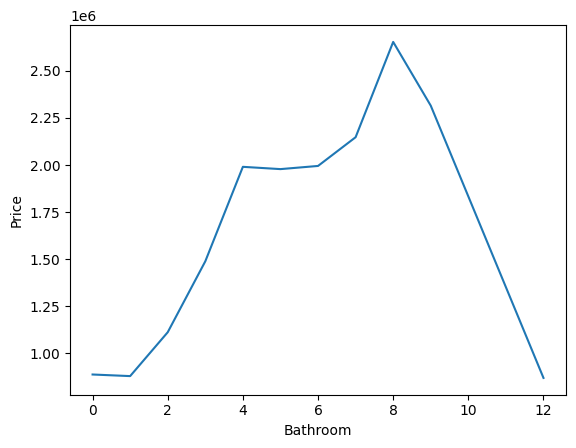

In [26]:
# calcular el precio medio por Bathroom
df_bath_price = df.groupby('Bathroom')['Price'].mean().reset_index()
sns.lineplot(data=df_bath_price ,x='Bathroom', y='Price')

In [27]:
# filtrar lo que tengan más de 7 baños
filter = df['Bathroom'] > 7
df_8_bath = df[filter]
df_8_bath.shape # Hay 5 casas de más de 7 baños

(5, 20)

In [28]:
# excluir las que tengan más de 7 baños
filter = df['Bathroom'] <= 7
df_8_bath = df[filter]
df_8_bath.shape

(26626, 20)

In [29]:
# borrar las que tengan más de 7 baños
filter = df['Bathroom'] > 7
print(df.shape)
df.drop(df[filter].index, inplace=True) # Borra las filas
print(df.shape)


(34857, 20)
(34852, 20)


<Axes: xlabel='Bathroom', ylabel='Price'>

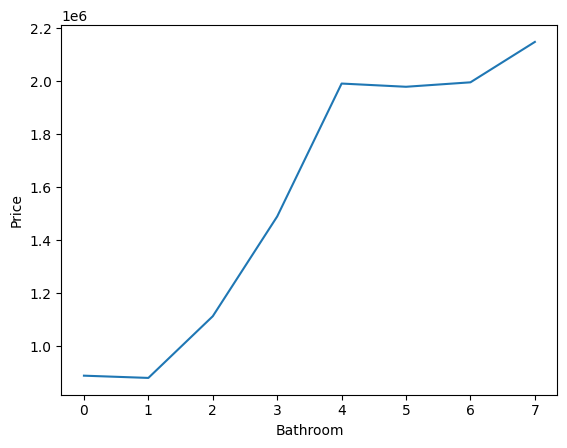

In [30]:
df_bath_price = df.groupby('Bathroom')['Price'].mean().reset_index()
sns.lineplot(data=df_bath_price ,x='Bathroom', y='Price')

In [31]:
# filter = df['Rooms'] == df.iloc[15]['Rooms']
# df['Bathroom'][filter].median()

In [32]:
df['Bathroom'].value_counts()

1.0    12969
2.0    11064
3.0     2181
4.0      269
5.0       77
0.0       46
6.0       16
7.0        4
Name: Bathroom, dtype: int64

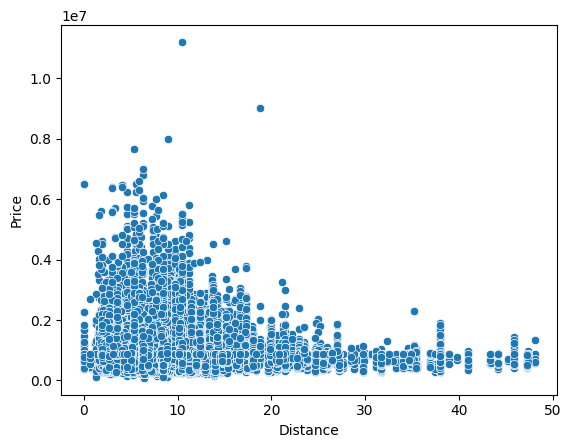

In [74]:
sns.scatterplot(data=df, x='Distance', y='Price');

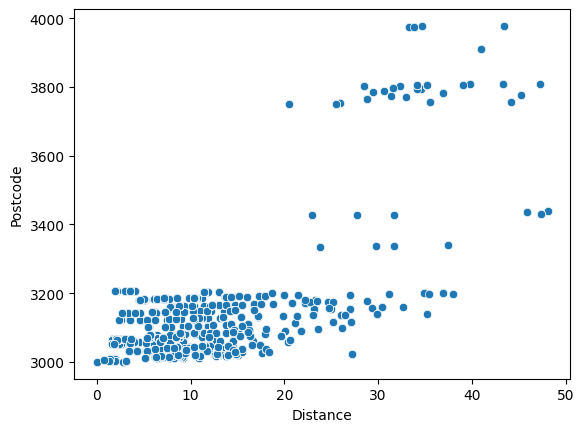

In [75]:
sns.scatterplot(data=df, x='Distance', y='Postcode');

In [81]:
df.head(1)

Suburb        Address  Rooms Type     Price Method SellerG       Date  \
0  Abbotsford  68 Studley St      2    h  870000.0     SS  Jellis  3/09/2016   

   Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0       2.5    3067.0         1  1.0     126.0           0.0        NaN   

          CouncilArea  Lattitude  Longtitude             Regionname  \
0  Yarra City Council   -37.8014    144.9958  Northern Metropolitan   

   Propertycount  
0         4019.0

In [90]:
# sns.boxplot(data=df, x='Type', y='Price')
sns.boxplot(data=df, x='Method', y='Price')

# sns.countplot(data=df, x='Regionname')
# plt.xticks(rotation=45);

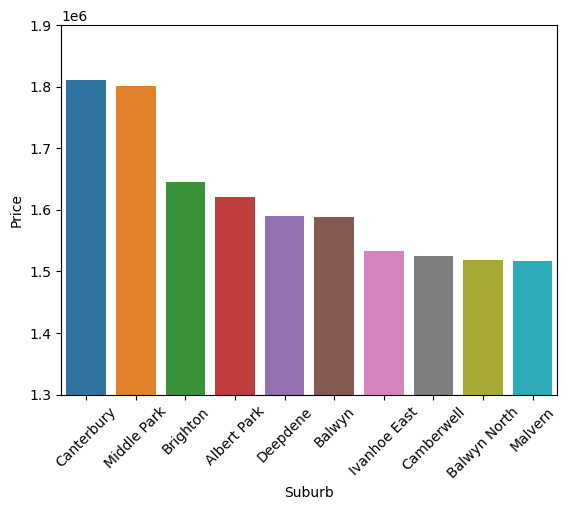

In [108]:
# Los 10 barrios más baratos en precio promedio
# df_suburb = df.groupby('Suburb')['Price'].mean().reset_index().sort_values('Price')[:10]
# df_suburb = df.groupby('Suburb')['Price'].mean().nsmallest(10).reset_index()

# Los 10 barrios más caros en precio promedio
# df_suburb = df.groupby('Suburb')['Price'].mean().reset_index().sort_values('Price', ascending=False)[:10]
df_suburb = df.groupby('Suburb')['Price'].mean().nlargest(10).reset_index()

ax = sns.barplot(data=df_suburb, x='Suburb', y='Price')
plt.xticks(rotation=45);
# ax.set_ylim([350000, 600000])
ax.set_ylim([1300000, 1900000]);

c:\Users\alanj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


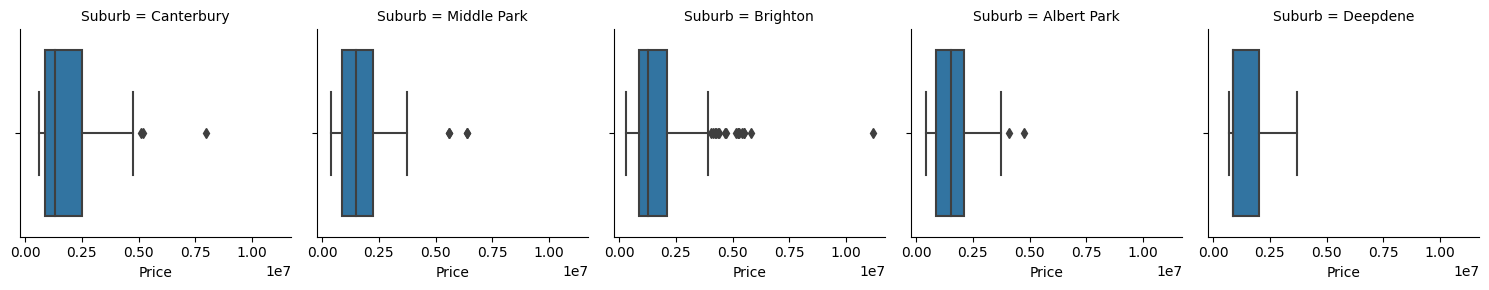

In [128]:
top_suburbs = df.groupby('Suburb')['Price'].mean().nlargest(5).index
filter = df['Suburb'].isin(top_suburbs)
grid = sns.FacetGrid(df[filter], col='Suburb', col_wrap=5, height=3, col_order=top_suburbs)
grid.map(sns.boxplot, 'Price');

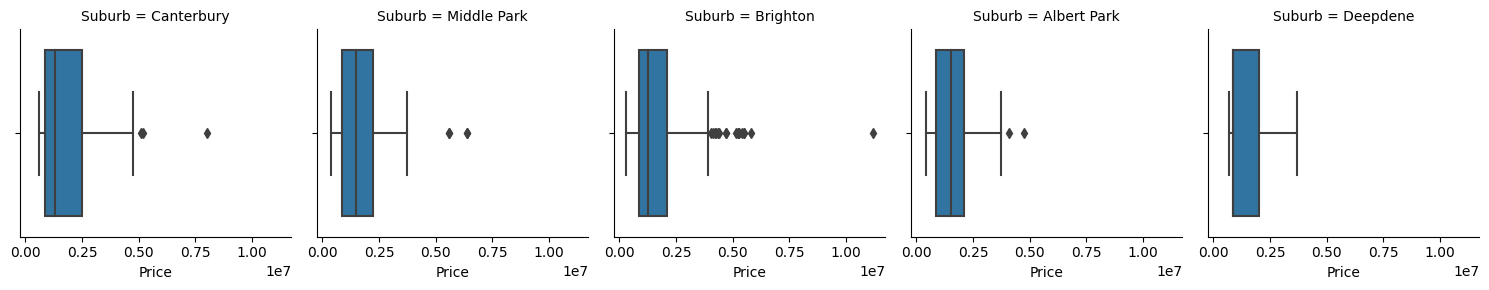

In [133]:
sns.catplot(data=df[filter], x='Price', col='Suburb', kind='box', height=3, col_order=top_suburbs);

In [136]:
len(df['Date'].unique())

78

In [137]:
df['Date'].value_counts()

28/10/2017    1117
17/03/2018     970
24/02/2018     941
9/12/2017      927
25/11/2017     902
              ... 
4/02/2016       44
30/09/2017      22
20/01/2018      19
27/01/2018      12
28/01/2016       3
Name: Date, Length: 78, dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34852 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34852 non-null  object 
 1   Address        34852 non-null  object 
 2   Rooms          34852 non-null  int64  
 3   Type           34852 non-null  object 
 4   Price          34852 non-null  float64
 5   Method         34852 non-null  object 
 6   SellerG        34852 non-null  object 
 7   Date           34852 non-null  object 
 8   Distance       34851 non-null  float64
 9   Postcode       34851 non-null  float64
 10  Bathroom       34852 non-null  int32  
 11  Car            26124 non-null  float64
 12  Landsize       23043 non-null  float64
 13  BuildingArea   34852 non-null  float64
 14  YearBuilt      15548 non-null  float64
 15  CouncilArea    34849 non-null  object 
 16  Lattitude      26876 non-null  float64
 17  Longtitude     26876 non-null  float64
 18  Region

In [147]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False) ## DD-MM-YYYY
df['year'] = df['Date'].dt.year
df['quarter'] = df['Date'].dt.quarter
df['month'] = df['Date'].dt.month
df['week_num'] = df['Date'].dt.isocalendar().week

In [148]:
df.head(1)

Suburb        Address  Rooms Type     Price Method SellerG       Date  \
0  Abbotsford  68 Studley St      2    h  870000.0     SS  Jellis 2016-03-09   

   Distance  Postcode  ...  YearBuilt         CouncilArea  Lattitude  \
0       2.5    3067.0  ...        NaN  Yarra City Council   -37.8014   

   Longtitude             Regionname Propertycount  year  month week_num  \
0    144.9958  Northern Metropolitan        4019.0  2016      3       10   

   quarter  
0        1  

[1 rows x 24 columns]

<Axes: xlabel='year', ylabel='count'>

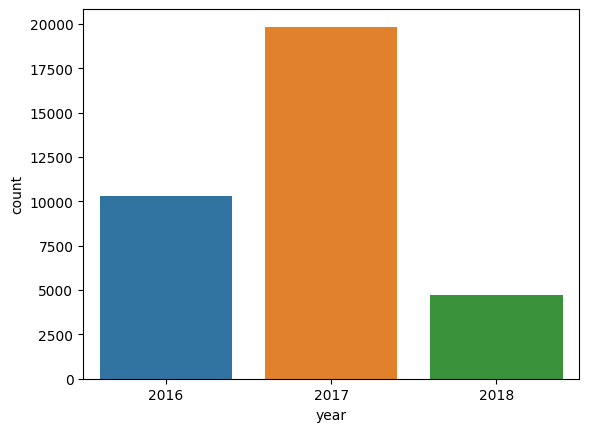

In [149]:
# número de viviendas vendidas por año
sns.countplot(data=df, x='year')

<Axes: xlabel='month', ylabel='count'>

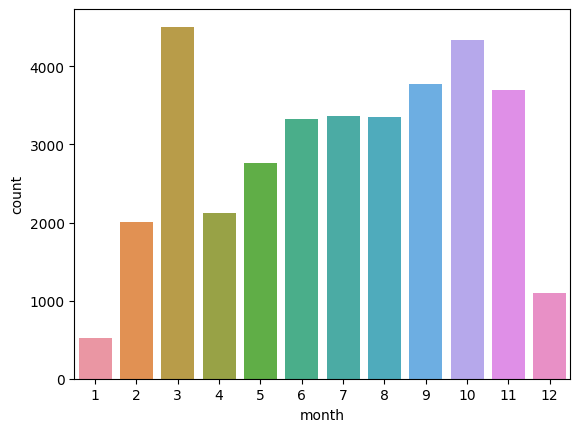

In [152]:
sns.countplot(data=df, x='month')

<Axes: xlabel='quarter', ylabel='count'>

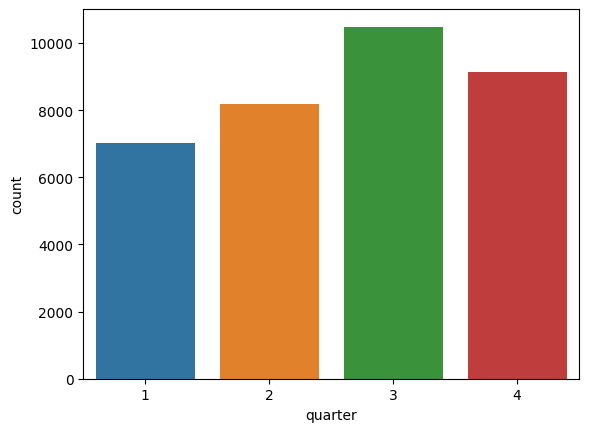

In [153]:
sns.countplot(data=df, x='quarter')

<Axes: xlabel='week_num', ylabel='count'>

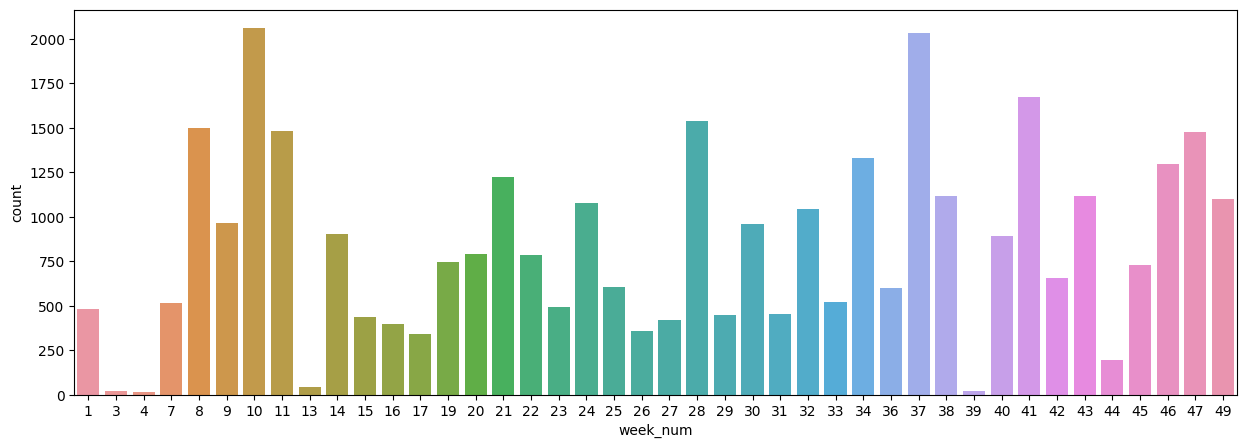

In [157]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='week_num')

<Axes: xlabel='week_num', ylabel='count'>

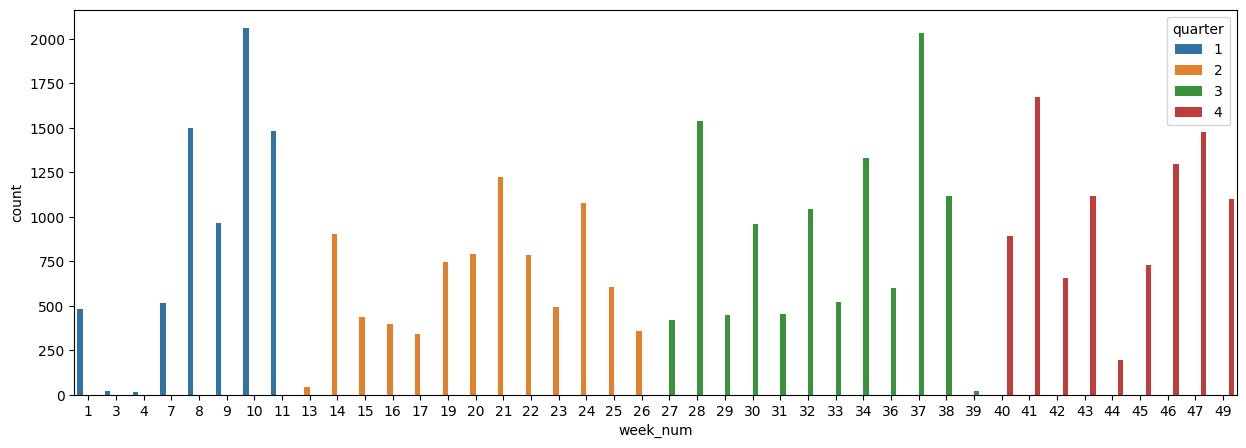

In [160]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='week_num', hue='quarter')

<Axes: xlabel='month', ylabel='count'>

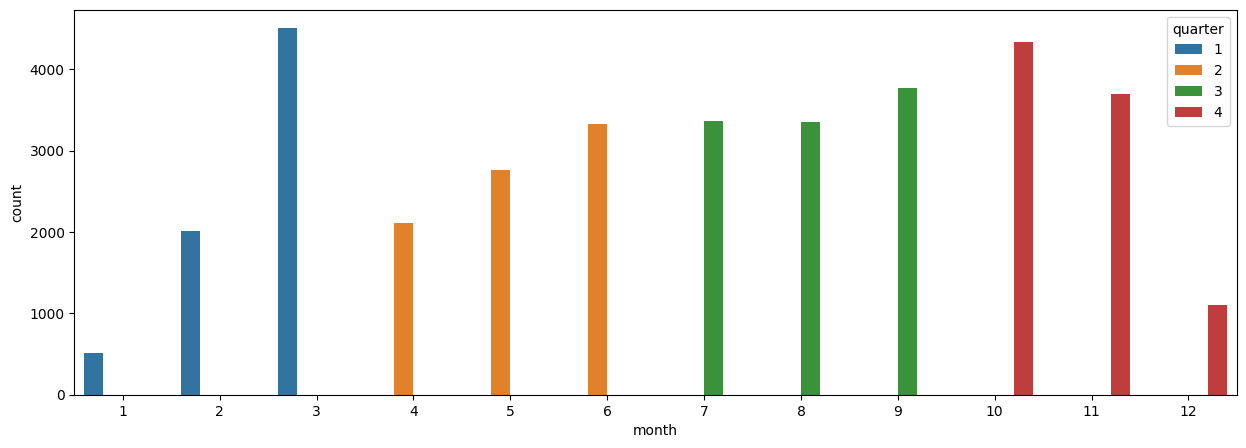

In [163]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='month', hue='quarter')

<Axes: xlabel='count', ylabel='week_num'>

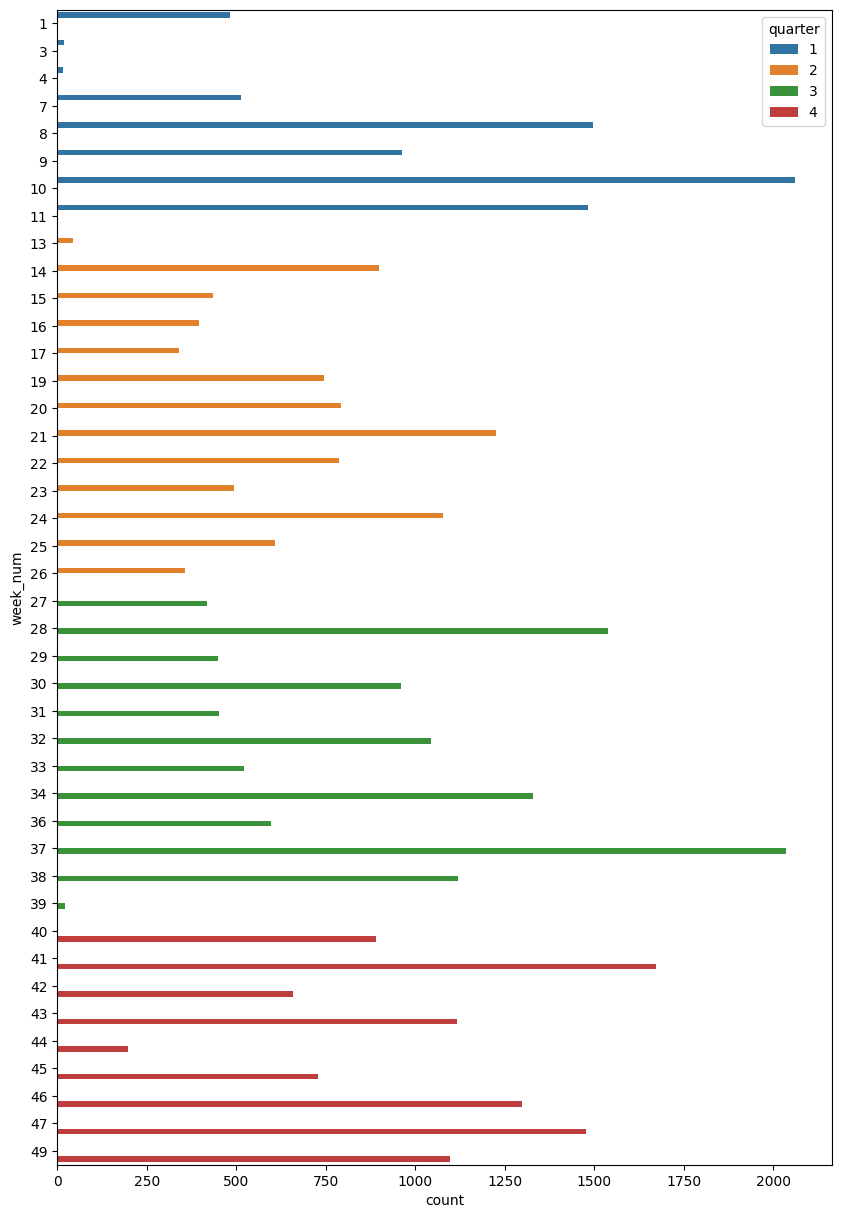

In [167]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='week_num', hue='quarter')

(900000.0, 1100000.0)

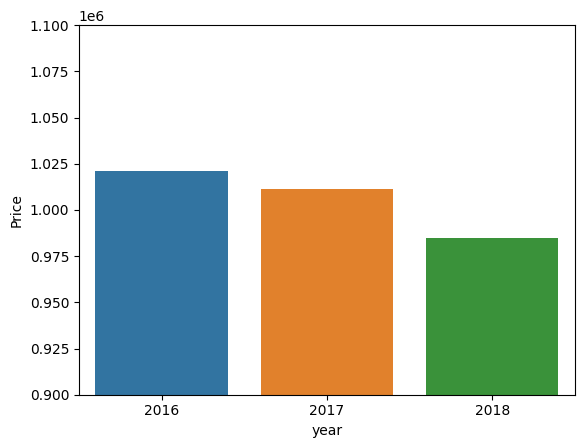

In [173]:
df_price_per_year = df.groupby('year')['Price'].mean().reset_index()
ax = sns.barplot(data=df_price_per_year, x='year', y='Price')
ax.set_ylim([900000, 1100000])

(800000.0, 1100000.0)

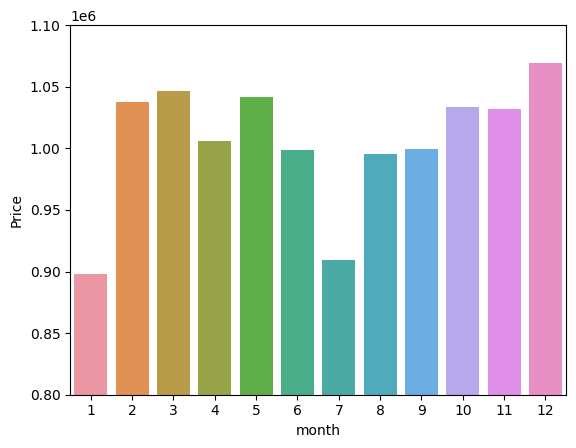

In [175]:
df_price_per_month = df.groupby('month')['Price'].mean().reset_index()
ax = sns.barplot(data=df_price_per_month, x='month', y='Price')
ax.set_ylim([800000, 1100000])

In [176]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_period.html

df['year_month'] = df['Date'].dt.to_period('M')
df.head(1)

Suburb        Address  Rooms Type     Price Method SellerG       Date  \
0  Abbotsford  68 Studley St      2    h  870000.0     SS  Jellis 2016-03-09   

   Distance  Postcode  ...         CouncilArea  Lattitude  Longtitude  \
0       2.5    3067.0  ...  Yarra City Council   -37.8014    144.9958   

              Regionname  Propertycount  year  month  week_num quarter  \
0  Northern Metropolitan         4019.0  2016      3        10       1   

   year_month  
0     2016-03  

[1 rows x 25 columns]

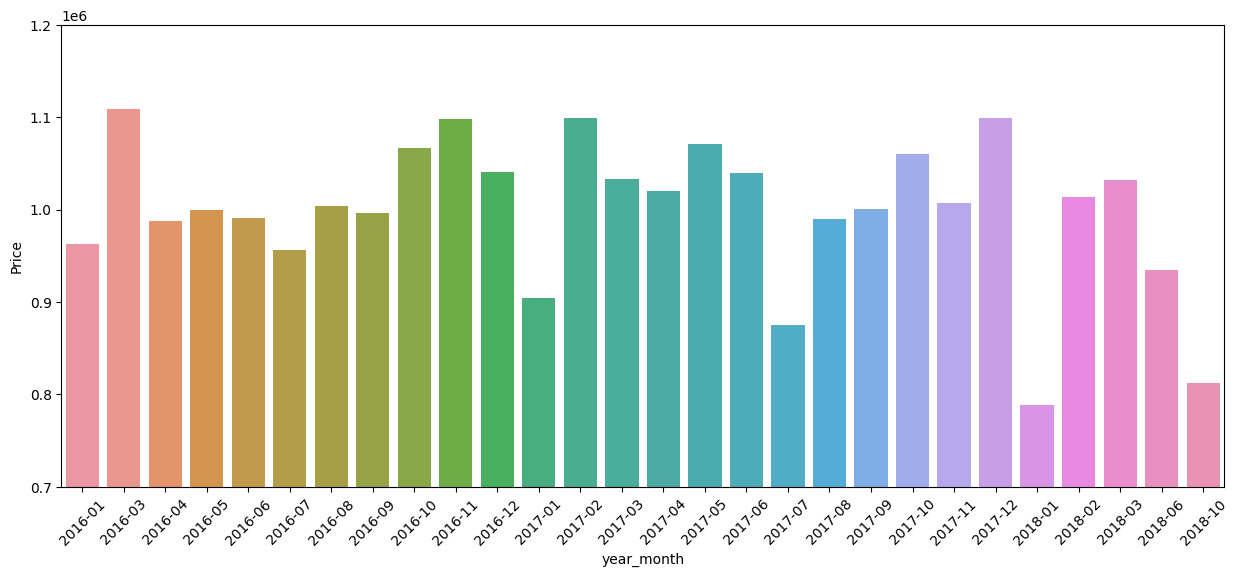

In [182]:
plt.figure(figsize=(15, 6))
df_price_per_month = df.groupby('year_month')['Price'].mean().reset_index()
ax = sns.barplot(data=df_price_per_month, x='year_month', y='Price')
ax.set_ylim([700000, 1200000])
plt.xticks(rotation=45);

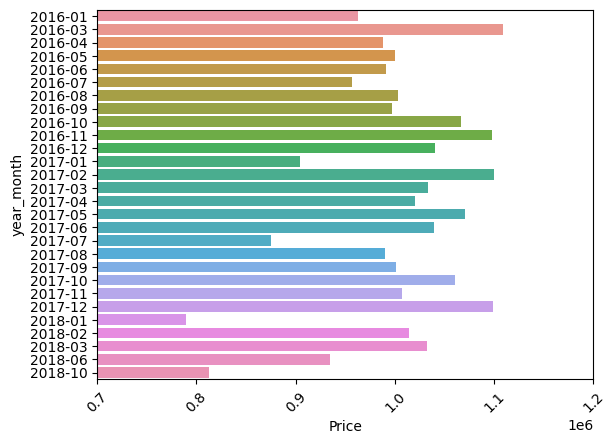

In [185]:
# plt.figure(figsize=(15, 15))
df_price_per_month = df.groupby('year_month')['Price'].mean().reset_index()
ax = sns.barplot(data=df_price_per_month, x='Price', y='year_month')
# ax.set_ylim([700000, 1200000])
ax.set_xlim([700000, 1200000])
plt.xticks(rotation=45);

## Rellenar valores faltantes

In [33]:
# imputar valores nulos en Bathroom basándonos en la columna Rooms por ser la más correlacionada con Bathroom
filter1 = df['Bathroom'].isnull()

for i in df[filter1].index:
    filter2 = df['Rooms'] == df.loc[i, 'Rooms']
    median = df.loc[filter2, 'Bathroom'].median()

    if not pd.isnull(median):
        df.loc[i, 'Bathroom'] = median
    else:
        df.loc[i, 'Bathroom'] = df['Bathroom'].median()


In [34]:
df['Bathroom'] = df['Bathroom'].round().astype(int)
df['Bathroom'].value_counts()

1    19432
2    12531
3     2475
4      269
5       79
0       46
6       16
7        4
Name: Bathroom, dtype: int64

In [35]:
calc_missing(df)

Distance 1 / 34852 0.00 %
Postcode 1 / 34852 0.00 %
Car 8728 / 34852 25.04 %
Landsize 11809 / 34852 33.88 %
YearBuilt 19304 / 34852 55.39 %
CouncilArea 3 / 34852 0.01 %
Lattitude 7976 / 34852 22.89 %
Longtitude 7976 / 34852 22.89 %
Regionname 3 / 34852 0.01 %
Propertycount 3 / 34852 0.01 %


## Mapas, Geolocalización: Latitud y Longitud

In [36]:
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h   870000.0     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u   870000.0     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0         1  1.0     126.0           0.0   
1  3/12/2016       2.5    3067.0         1  1.0     202.0           0.0   
2  4/02/2016       2.5    3067.0         1  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0         2  1.0       0.0           0.0   
4  4/03/2017       2.5    3067.0         2  0.0     134.0         150.0   

   YearBuilt         CouncilArea  Lattitude  Longtitude  \
0        NaN  Yarra City Council   -37.8014    144.9958   
1        NaN  Yarra City Council   -37.7996    144.9984   
2     1900.0  Yarra City Council   -37.8079    144.9934   
3        NaN  Yarra City Council   -37.8114    145.0116   
4     1900.0  Yarra City Council   -37.8093    144.9944   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [37]:
# https://geopy.readthedocs.io/en/stable/
# pip install geopy

# Obtener coordenadas a partir de una dirección
from geopy.geocoders import Nominatim

address = '68 Studley St Abbotsford'

geolocator = Nominatim(user_agent="MozillaFirefox")
location = geolocator.geocode(address)

print(location.latitude, location.longitude)

-37.8014257 144.9951832


In [72]:
# Obtener dirección a partir de unas coordenadas
latitude = -37.8014257
longitude = 144.9951832

geolocator = Nominatim(user_agent="MozillaFirefox")
location = geolocator.reverse([latitude, longitude])

print(location.address)

for text in location.address.split(','):
    print(text)


Studley Street, Abbotsford, Melbourne, City of Yarra, Victoria, 3067, Australia
Studley Street
 Abbotsford
 Melbourne
 City of Yarra
 Victoria
 3067
 Australia


<Axes: xlabel='Longtitude', ylabel='Lattitude'>

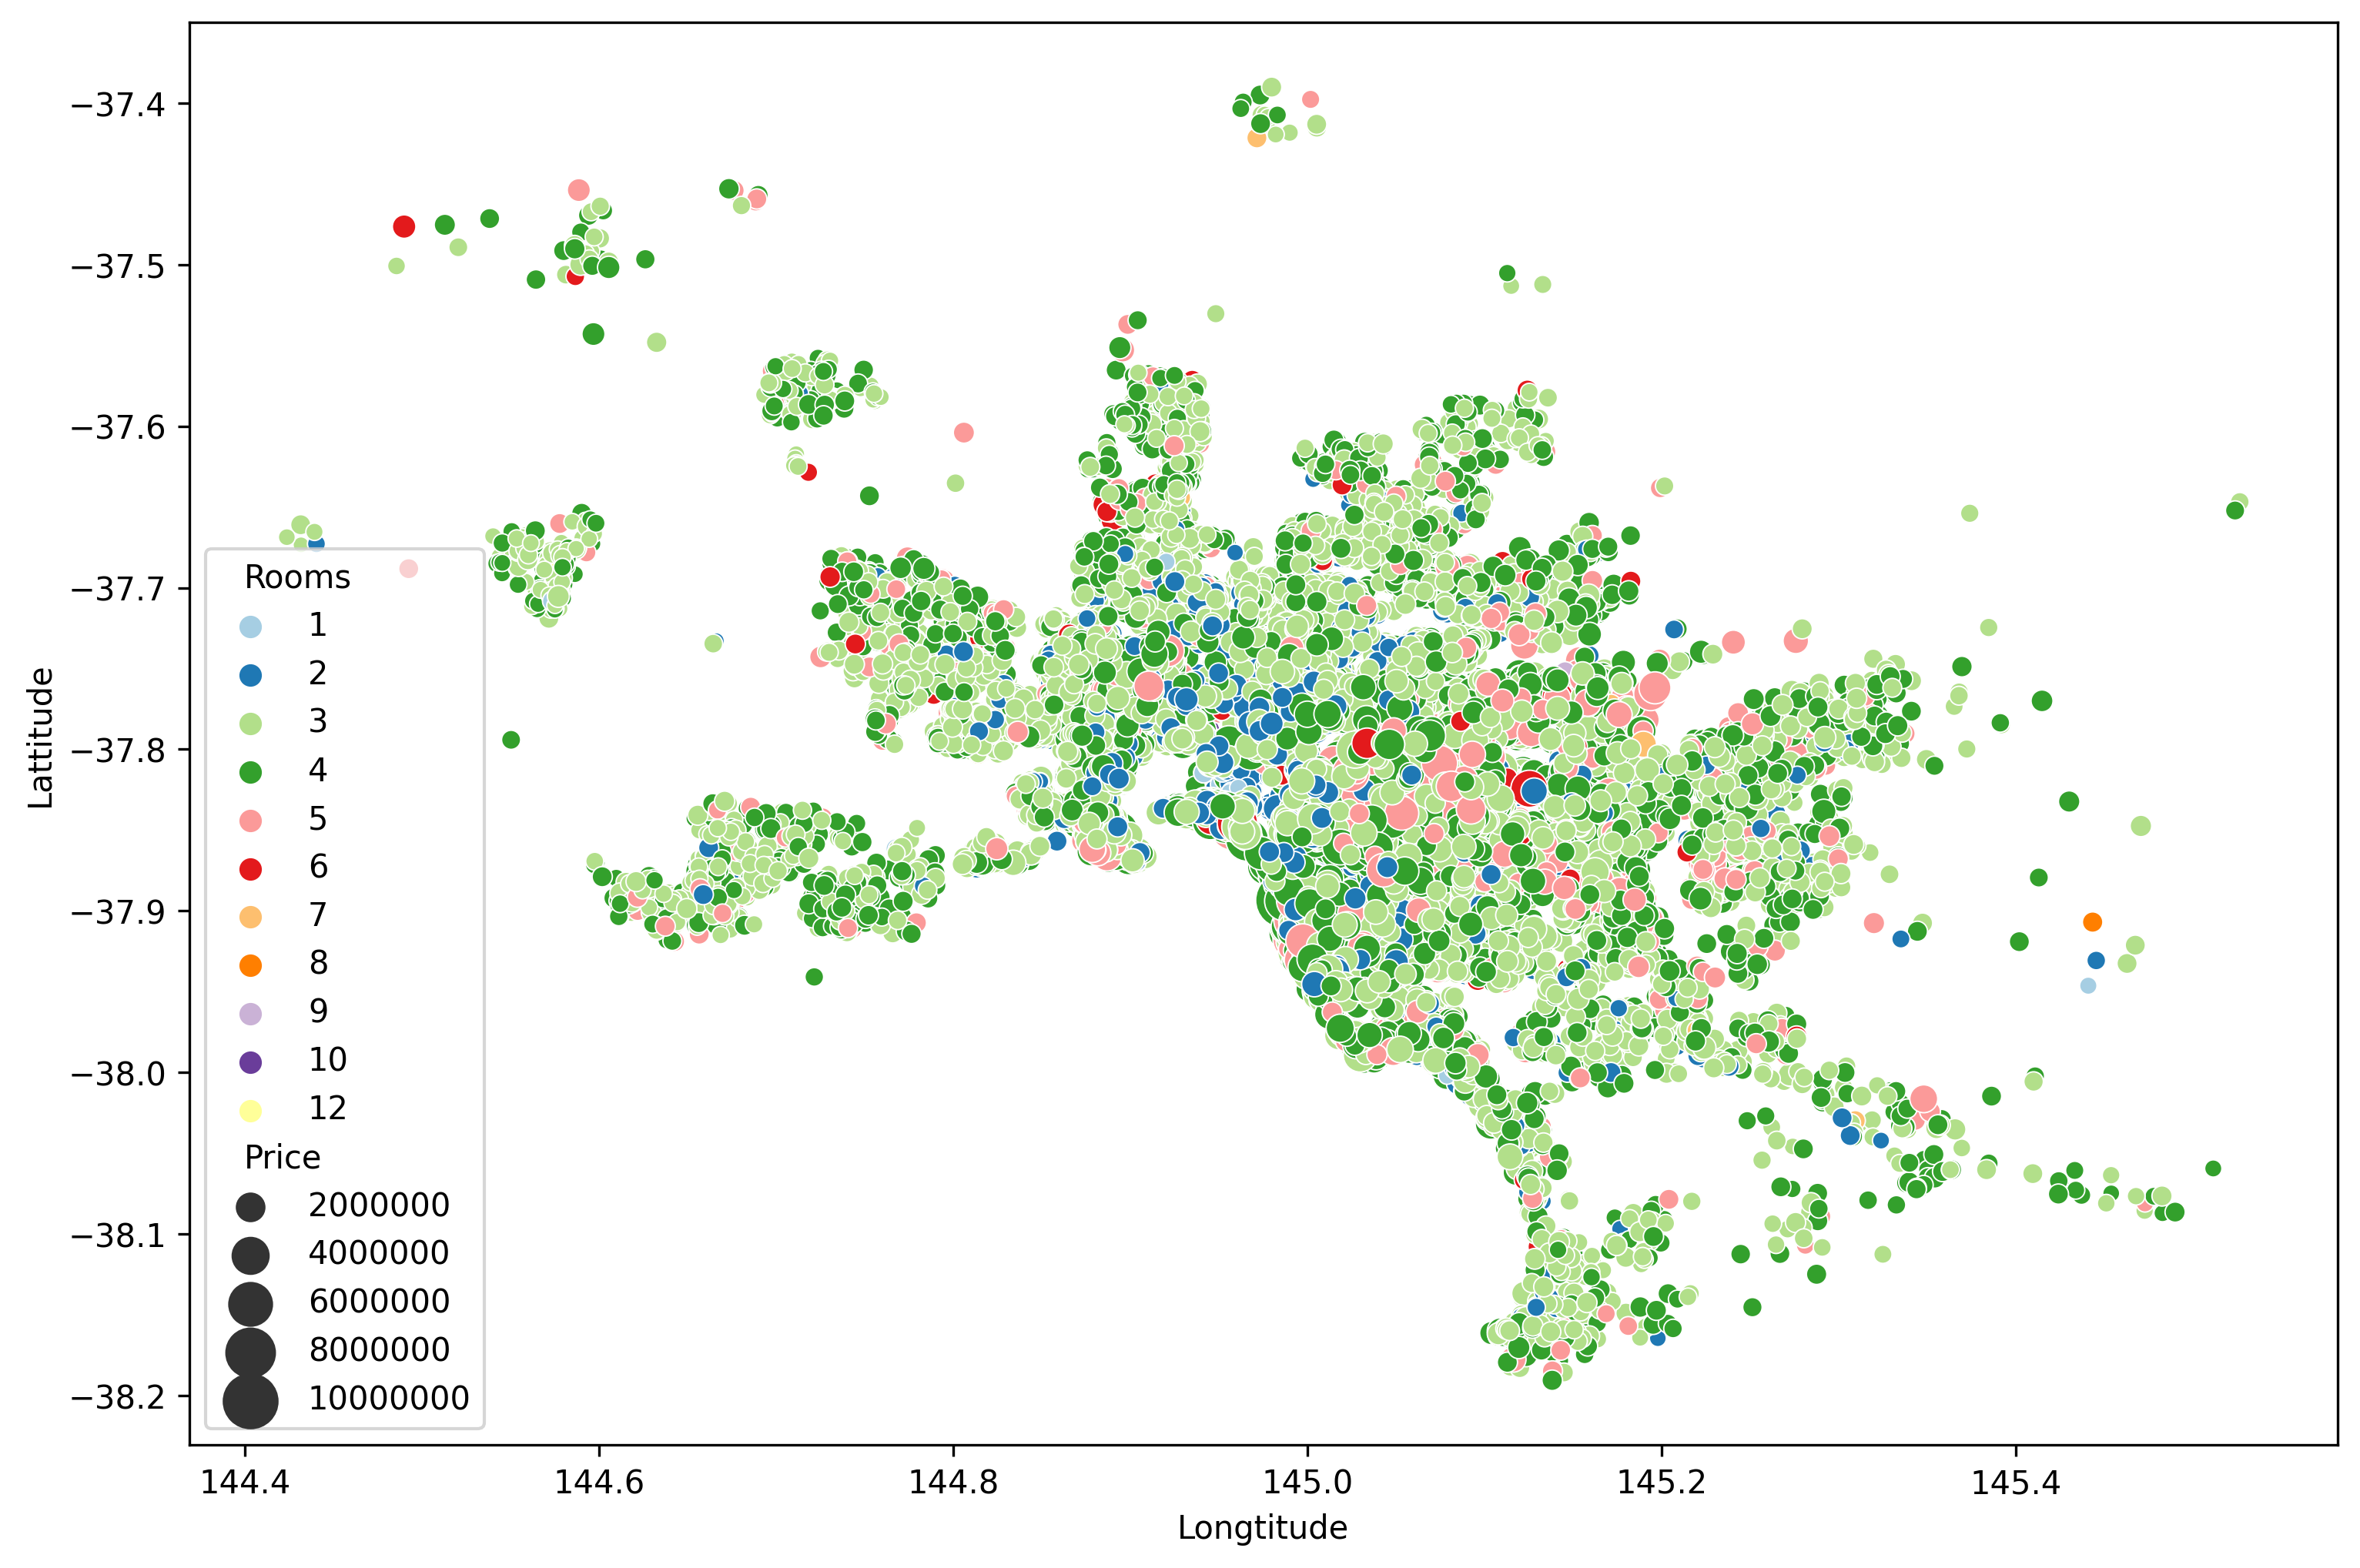

In [38]:
# sns.scatterplot
plt.figure(figsize=(12, 8), dpi=300)
sns.scatterplot(data=df, 
                x='Longtitude', y='Lattitude', palette='Paired', hue='Rooms', size='Price', sizes=(20, 300))

In [62]:
# https://python-visualization.github.io/folium/
# pip install folium
import folium

map_center = [df['Lattitude'].median(), df['Longtitude'].median()]
m = folium.Map(location=map_center, zoom_start=10)

for index, row in df.sample(10000).iterrows():
    if pd.isnull(row['Lattitude']) or pd.isnull(row['Longtitude']):
        continue

    folium.CircleMarker(
        location=(row['Lattitude'], row['Longtitude']),
        radius=1,
        weight=2,
        fill_opacity=0.5
        ).add_to(m)

m

In [68]:

from folium.plugins import HeatMap

map_center = [df['Lattitude'].median(), df['Longtitude'].median()]
m = folium.Map(location=map_center, zoom_start=10)

# lista de cordenadas
coords = df[['Lattitude', 'Longtitude']].dropna().values.tolist()

# mapa de calor
HeatMap(coords, min_opacity=0.4, blur=18).add_to(m)

m

# Para ver mapa de calor en base al tiempo:
# https://blog.jovian.com/interesting-heatmaps-using-python-folium-ee41b118a996

## Análisis multivariante

C:\Users\alanj\AppData\Local\Temp\ipykernel_15856\1471491446.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


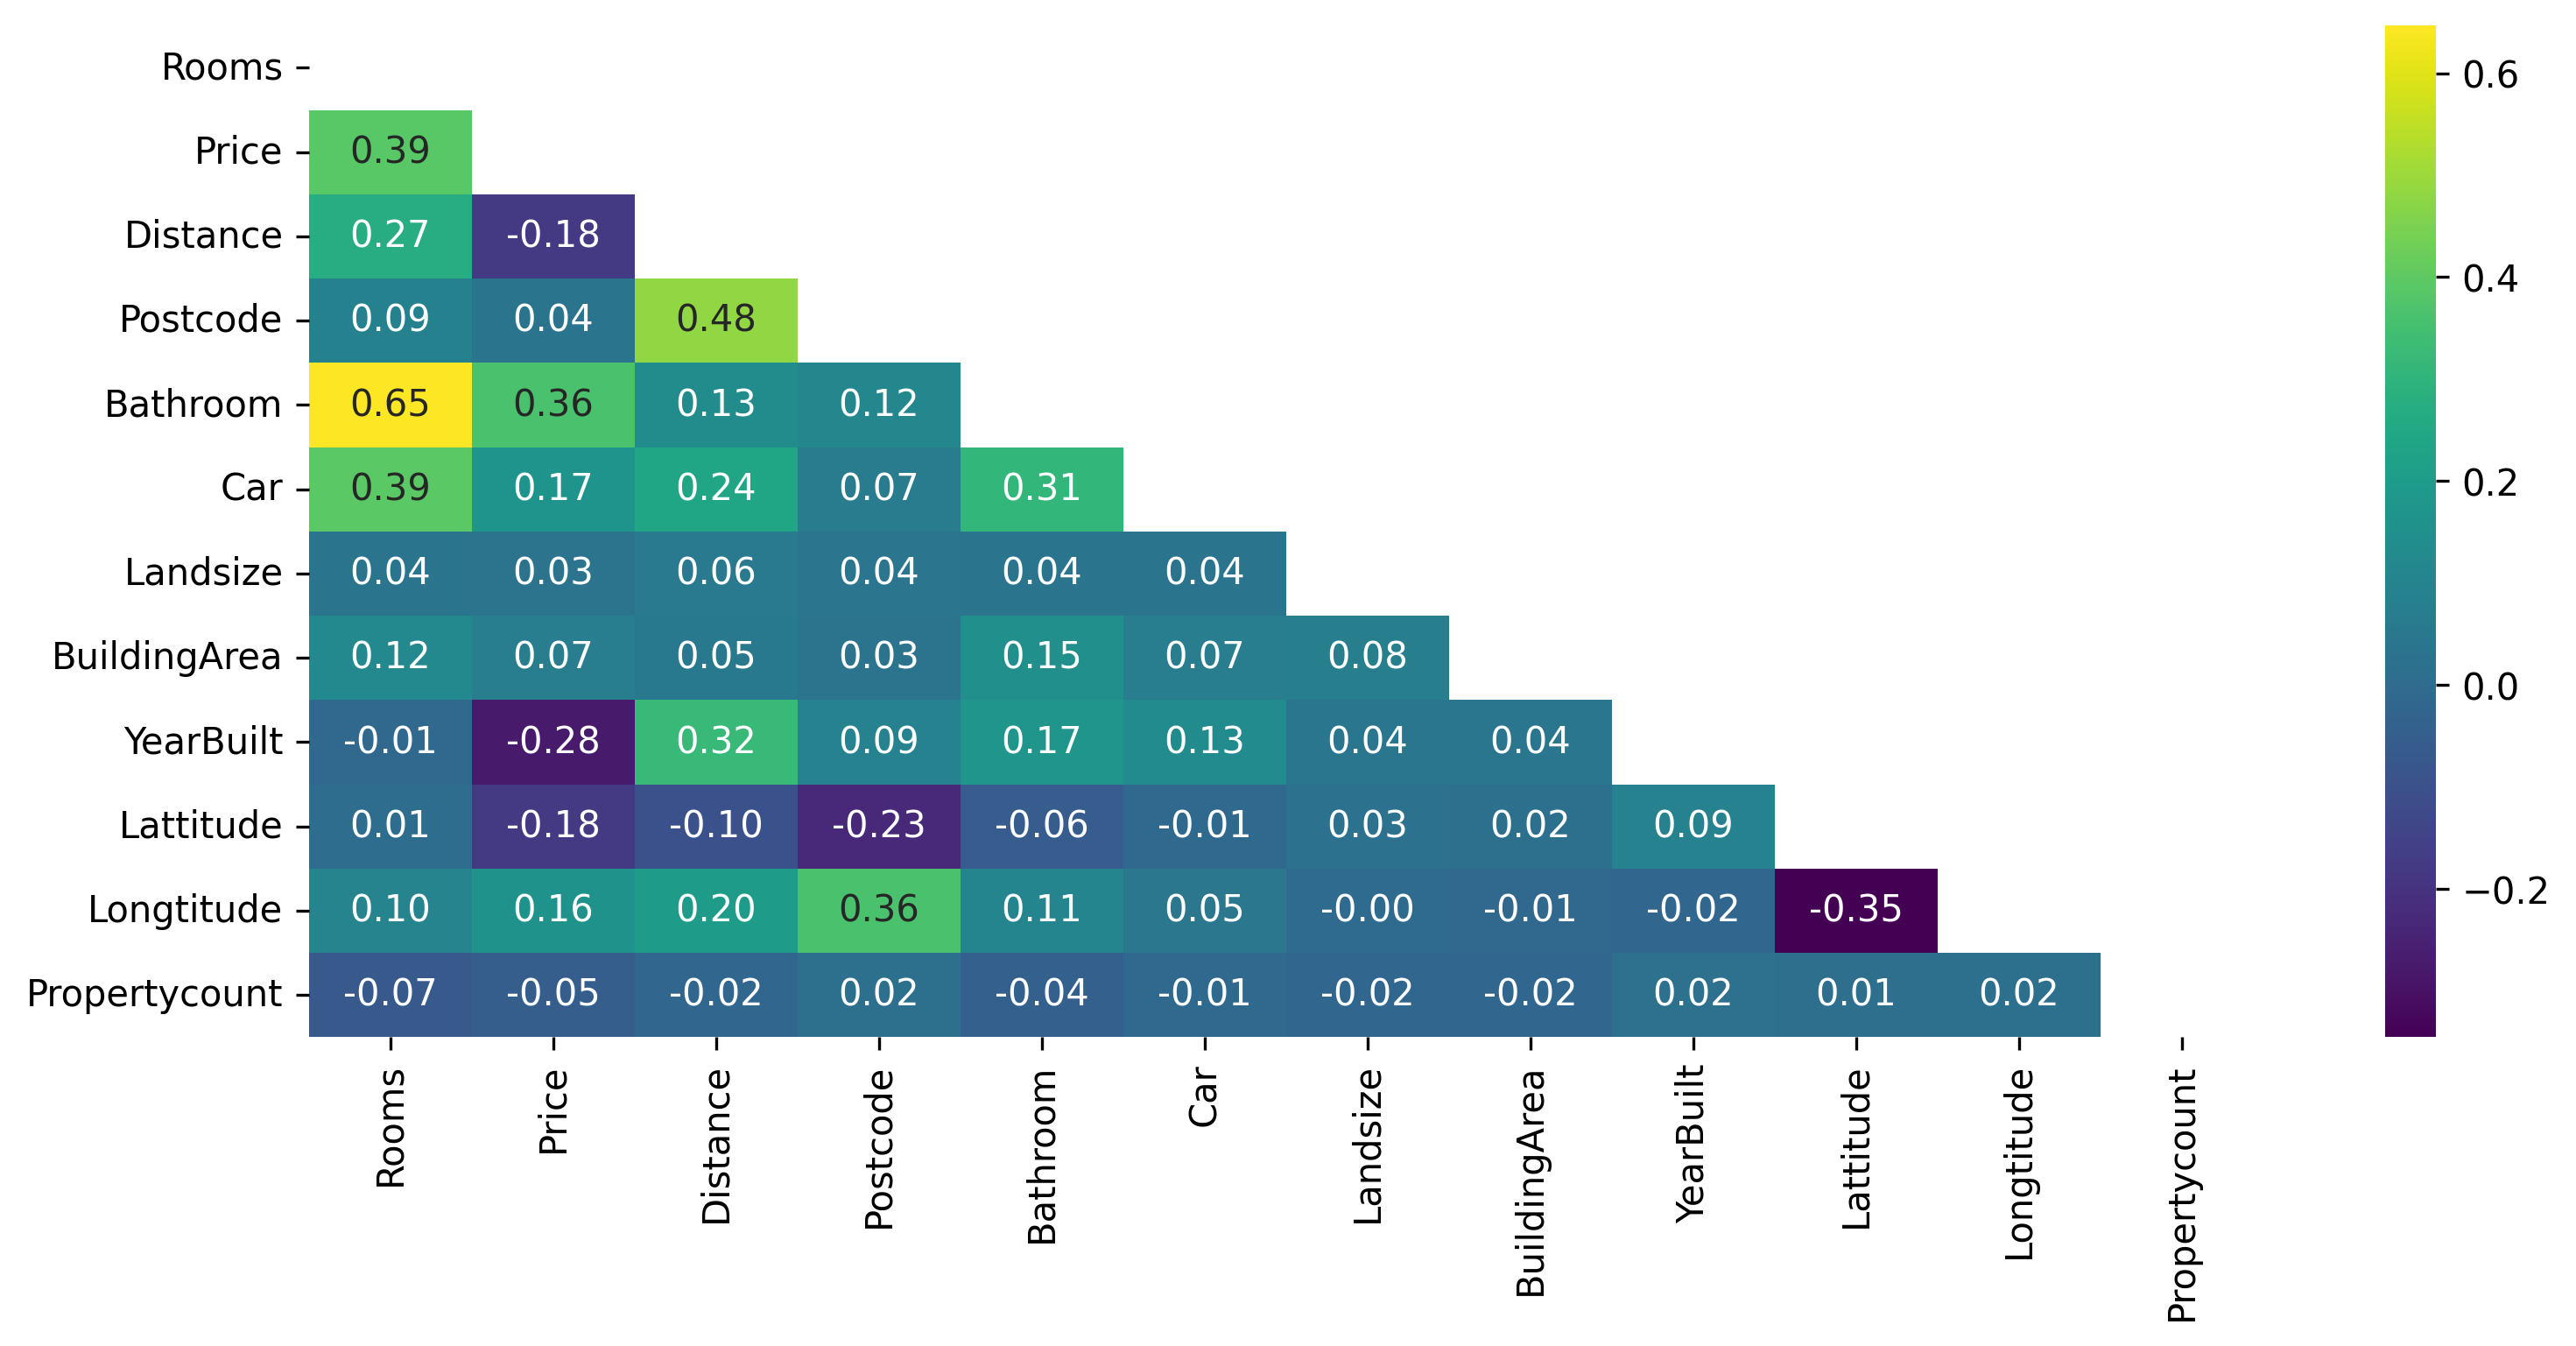

In [40]:
plt.figure(figsize=(12,5), dpi=300)
import numpy as np
df_corr = df.corr()
filter = np.triu(df_corr) 
sns.heatmap(df_corr, annot=True, cmap='viridis', mask=filter, fmt=".2f");

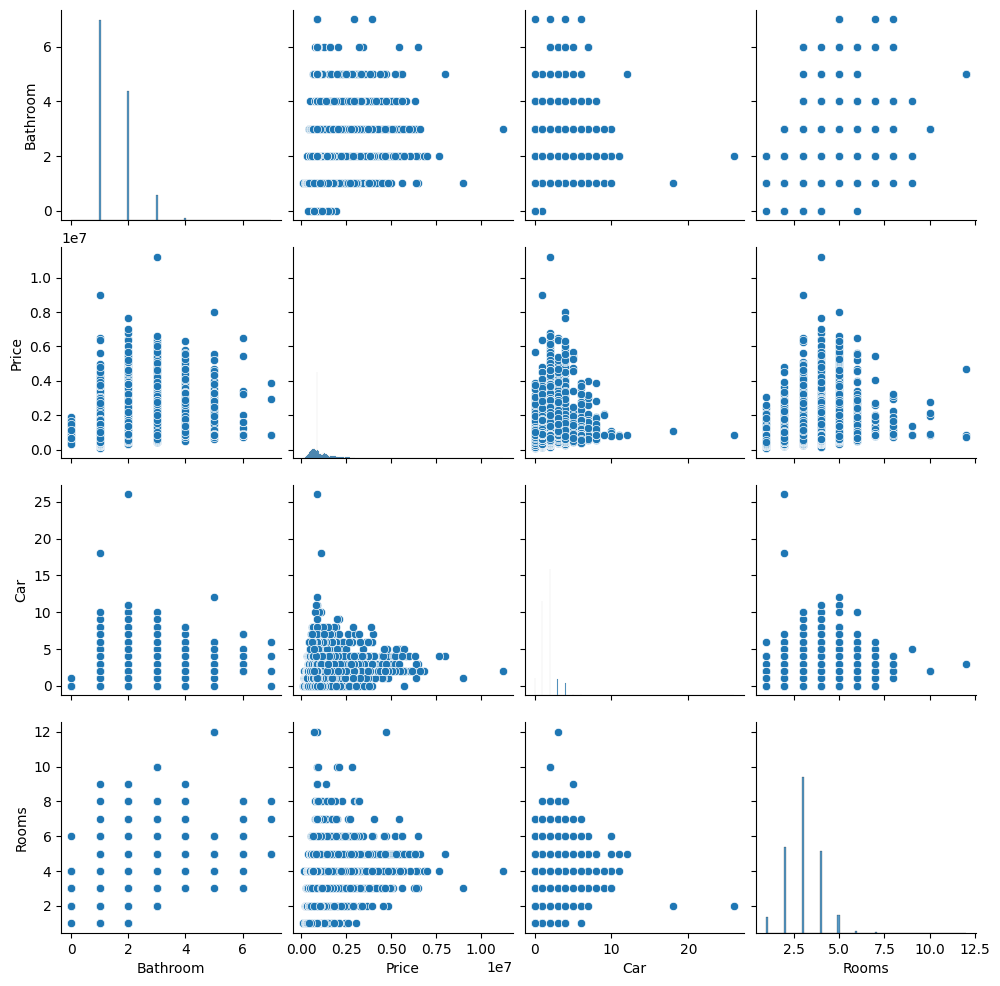

In [41]:
# pairplot de Bathroom, Price, Rooms, Car
sns.pairplot(df[['Bathroom', 'Price', 'Car', 'Rooms']])

In [ ]:
# clustermap tabla pivotante 